In [1]:
#from customplot import *
#import itertools
#import sqlite3
%autosave 0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Autosave disabled


C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [3]:
df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)

In [4]:
df

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1_sim,MGP2_sim,MGP3_sim,MGP4_sim,MGP5_sim,MGP6_sim,MGP7_sim,MGP8_sim,MGP9_sim,MGP10_sim,MGP11_sim,MGP12_sim,MGP13_sim,MGP14_sim,Perda30,PerdaAPI,PerdaPS,PERDA_MAX
1,C1,C1P1,A1,0.08,0.54,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,100.00
2,C1,C1P1,A2,0.05,0.05,1000.00,0.5400,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,12.00
3,C1,C1P1,A3,0.05,0.05,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,10.00
4,C1,C1P1,B1,0.13,0.92,3000.00,0.6300,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00
5,C1,C1P2,A1,0.16,0.83,300.00,0.4200,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,999.00
7,C1,C1P2,A3,0.46,0.95,17.00,0.6040,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,500.00
8,C1,C1P2,B1,0.12,0.84,127.00,0.6950,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,450.00
9,C1,C1P3,A1,0.05,0.05,1000.00,0.4700,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,120.00
11,C1,C1P3,A3,0.26,0.95,120.00,0.3630,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,60.00
12,C1,C1P3,B1,0.05,0.05,1000.00,0.3500,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,300.00


In [5]:
df.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim', 'Perda30',
       'PerdaAPI', 'PerdaPS', 'PERDA_MAX'],
      dtype='object')

In [7]:
X=df[['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]]

In [8]:
X

,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1_sim,MGP2_sim,MGP3_sim,MGP4_sim,MGP5_sim,MGP6_sim,MGP7_sim,MGP8_sim,MGP9_sim,MGP10_sim,MGP11_sim,MGP12_sim,MGP13_sim,MGP14_sim
1,0.08,0.54,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0
2,0.05,0.05,1000.00,0.5400,1,1,1,1,0,0,0,1,1,1,0,0,0,0
3,0.05,0.05,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0
4,0.13,0.92,3000.00,0.6300,1,1,1,1,0,0,0,1,1,1,0,0,0,0
5,0.16,0.83,300.00,0.4200,1,1,1,1,1,1,0,1,1,1,1,1,1,1
7,0.46,0.95,17.00,0.6040,1,1,1,1,1,1,0,1,1,1,1,1,1,1
8,0.12,0.84,127.00,0.6950,1,1,1,1,1,1,0,1,1,1,1,1,1,1
9,0.05,0.05,1000.00,0.4700,0,1,1,1,0,0,0,0,1,1,1,1,0,1
11,0.26,0.95,120.00,0.3630,0,1,1,1,0,0,0,0,1,1,1,1,0,1
12,0.05,0.05,1000.00,0.3500,0,1,1,1,0,0,0,0,1,1,1,1,0,1


In [9]:
y = df['Perda30']

In [10]:
#y

In [11]:
#df["B"] = df["A"].astype('category')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)

## Keras Model

In [13]:
n_cols = X_train.shape[1] # Save the number of samples' columns: n_cols

target = to_categorical(y_train)

model = Sequential() # Set up the model: model

model.add(Dense(50, activation='relu', input_shape=(n_cols,))) # Add the first layer

model.add(Dense(32, activation='relu')) # Add the second layer

model.add(Dense(2, activation='softmax')) # Add the output layer

model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 
#Compile the model
#categorical_crossentropy: more commom for classification

early_stopping_monitor = EarlyStopping(monitor='acc',patience=5)

print("Loss function: " + model.loss) # Verify that model contains information from compiling

model_training = model.fit(X_train,target, epochs=30, callbacks=[early_stopping_monitor]) # Fit the model

predictions = model.predict(X_test)

Loss function: categorical_crossentropy
Epoch 1/30
234/234 [==============================] - 0s 814us/step - loss: 3.7837 - acc: 0.7350
Epoch 2/30
234/234 [==============================] - 0s 60us/step - loss: 2.9752 - acc: 0.8120
Epoch 3/30
234/234 [==============================] - 0s 60us/step - loss: 2.9751 - acc: 0.8120
Epoch 4/30
234/234 [==============================] - 0s 60us/step - loss: 2.9751 - acc: 0.8120
Epoch 5/30
234/234 [==============================] - 0s 68us/step - loss: 2.9750 - acc: 0.8120
Epoch 6/30
234/234 [==============================] - 0s 60us/step - loss: 2.9750 - acc: 0.8120
Epoch 7/30
234/234 [==============================] - 0s 56us/step - loss: 2.9749 - acc: 0.8120
Epoch 8/30
234/234 [==============================] - 0s 56us/step - loss: 2.9749 - acc: 0.8120
Epoch 9/30
234/234 [==============================] - 0s 77us/step - loss: 2.9748 - acc: 0.8120


In [14]:
model_2 = Sequential() # Set up the model: model

model_2.add(Dense(100, activation='relu', input_shape=(n_cols,))) # Add the first layer

model_2.add(Dense(100, activation='relu')) # Add the second layer

model_2.add(Dense(2, activation='softmax')) # Add the output layer

model_2.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 
#Compile the model
#categorical_crossentropy: more commom for classification

early_stopping_monitor = EarlyStopping(monitor='acc',patience=5)

print("Loss function: " + model.loss) # Verify that model contains information from compiling

model_2_training = model_2.fit(X_train,target, epochs=30, callbacks=[early_stopping_monitor]) # Fit the model

predictions_2 = model_2.predict(X_test)

Loss function: categorical_crossentropy
Epoch 1/30
234/234 [==============================] - 0s 841us/step - loss: 6.4073 - acc: 0.4786
Epoch 2/30
234/234 [==============================] - 0s 68us/step - loss: 2.9887 - acc: 0.8120
Epoch 3/30
234/234 [==============================] - 0s 64us/step - loss: 2.9884 - acc: 0.8120
Epoch 4/30
234/234 [==============================] - 0s 94us/step - loss: 2.9882 - acc: 0.8120
Epoch 5/30
234/234 [==============================] - 0s 60us/step - loss: 2.9880 - acc: 0.8120
Epoch 6/30
234/234 [==============================] - 0s 60us/step - loss: 2.9878 - acc: 0.8120
Epoch 7/30
234/234 [==============================] - 0s 56us/step - loss: 2.9875 - acc: 0.8120
Epoch 8/30
234/234 [==============================] - 0s 98us/step - loss: 2.9873 - acc: 0.8120


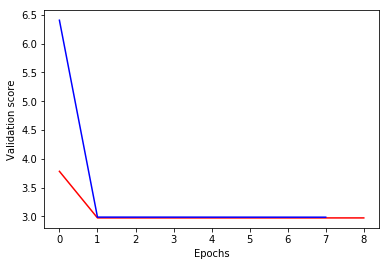

In [15]:
# Create the plot
plt.plot(model_training.history['loss'], 'r', model_2_training.history['loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

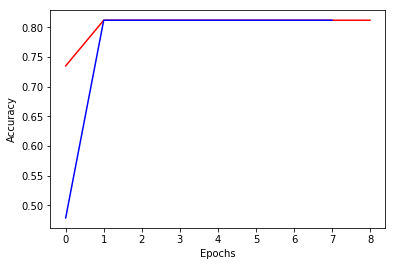

In [16]:
# Create the plot
plt.plot(model_training.history['acc'], 'r', model_2_training.history['acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [17]:
predicted_prob_true = predictions[:,1]
roc_auc_score(y_test, predicted_prob_true)
# print predicted_prob_true
#for i in range(len(predicted_prob_true)):
#    print(predicted_prob_true[i],"  ",y_test.values[i])

0.6437346437346437

In [18]:
type(predictions)

numpy.ndarray

In [19]:
y_predkeras=np.zeros(len(predictions))
for i in range(len(predictions[:,1])):
    if predictions[i,1] > 0.5:
        y_predkeras[i] = 1
    else:
        y_predkeras[i] = 0

In [20]:
y_predkeras

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
predictions

array([[1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [9.5525795e-01, 4.4742096e-02],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [9.8554695e-01, 1.4453013e-02],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.1017139e-29],
       [1.0000000e+00, 0.0000000e+00],
       [9.5815468e-01, 4.1845314e-02],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.

In [22]:
confusion_matrix(y_test,y_predkeras)

array([[37,  0],
       [22,  0]], dtype=int64)